In [8]:
import pandas as pd
import glob
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
a = pd.read_csv('new_csv3.csv')

In [11]:
a.shape

(45593, 21)

In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   45593 non-null  int64  
 1   ID                           45593 non-null  object 
 2   Delivery_person_ID           45593 non-null  object 
 3   Delivery_person_Age          43739 non-null  float64
 4   Delivery_person_Ratings      43685 non-null  float64
 5   Restaurant_latitude          45593 non-null  float64
 6   Restaurant_longitude         45593 non-null  float64
 7   Delivery_location_latitude   45593 non-null  float64
 8   Delivery_location_longitude  45593 non-null  float64
 9   Order_Date                   45593 non-null  object 
 10  Time_Orderd                  43862 non-null  object 
 11  Time_Order_picked            45593 non-null  object 
 12  Weather                      44977 non-null  object 
 13  Road_traffic_den

In [13]:
a

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,...,11:45,Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24.0
1,1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,...,19:50,Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33.0
2,2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,...,8:45,Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26.0
3,3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,...,18:10,Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21.0
4,4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,...,13:45,Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,...,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32.0
45589,45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,...,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36.0
45590,45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,...,24:05,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16.0
45591,45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,...,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26.0


In [14]:
a['ID'].duplicated().sum()

0

In [15]:
a['Delivery_person_ID'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45588     True
45589     True
45590     True
45591     True
45592     True
Name: Delivery_person_ID, Length: 45593, dtype: bool

In [16]:
a['Delivery_person_ID'].value_counts()

PUNERES01DEL01    67
JAPRES11DEL02     67
HYDRES04DEL02     66
JAPRES03DEL01     66
VADRES11DEL02     66
                  ..
DEHRES18DEL03      7
AURGRES11DEL03     7
KOLRES09DEL03      6
KOCRES16DEL03      6
BHPRES010DEL03     5
Name: Delivery_person_ID, Length: 1320, dtype: int64

## Dropping Column Unnamed: 0,ID& Delivery_person_ID

In [17]:
a= a[a.columns[2:]]

## Dropping Column Unnamed: Order_Date,Time_Orderd& Time_Order_picked as it is independent of target column time taken

In [18]:
a = a.drop(columns=['Order_Date','Time_Orderd','Time_Order_picked'])

# Filling the missing value

## Working on Delivery Person Age

In [19]:
np.sort(a['Delivery_person_Age'].unique())

array([15., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31.,
       32., 33., 34., 35., 36., 37., 38., 39., 50., nan])

In [20]:
a['Delivery_person_Age'].value_counts()

35.0    2262
36.0    2260
37.0    2227
30.0    2226
38.0    2219
24.0    2210
32.0    2202
22.0    2196
29.0    2191
33.0    2187
28.0    2179
25.0    2174
34.0    2166
26.0    2159
21.0    2153
27.0    2150
39.0    2144
20.0    2136
31.0    2120
23.0    2087
50.0      53
15.0      38
Name: Delivery_person_Age, dtype: int64

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Age'>

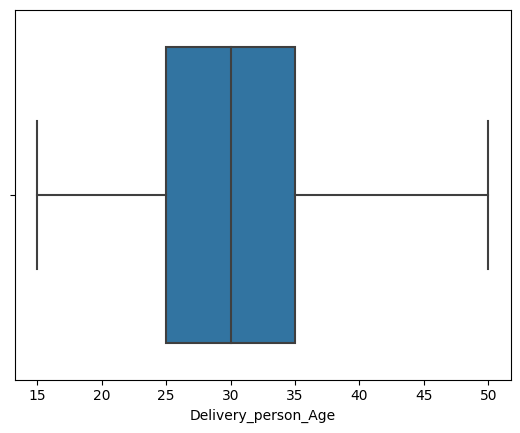

In [21]:
sns.boxplot(a['Delivery_person_Age'])

In [22]:
round(a['Delivery_person_Age'].mean())

30

### All value of age can be converted to integer from float & Also replace nan with mean

In [23]:
a['Delivery_person_Age'] = a['Delivery_person_Age'].fillna(round(a['Delivery_person_Age'].mean()))

In [24]:
a['Delivery_person_Age'] = a['Delivery_person_Age'].astype(int)

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Age'>

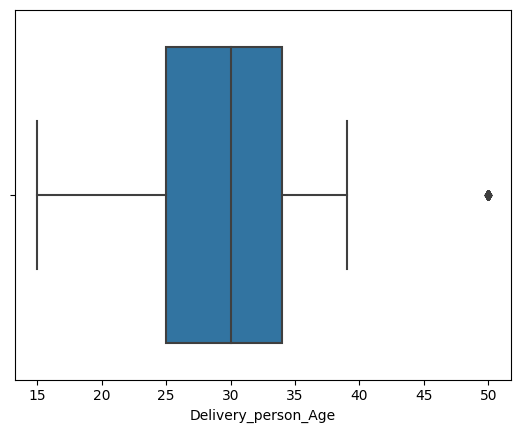

In [25]:
sns.boxplot(a['Delivery_person_Age'])

## Working on Delivery Person Rating

In [26]:
np.sort(a['Delivery_person_Ratings'].unique())

array([1. , 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. , 6. , nan])

In [27]:
a['Delivery_person_Ratings'].value_counts()

4.8    7148
4.7    7142
4.9    7041
4.6    6940
5.0    3996
4.5    3303
4.1    1430
4.2    1418
4.3    1409
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
6.0      53
1.0      38
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: Delivery_person_Ratings, dtype: int64

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Ratings'>

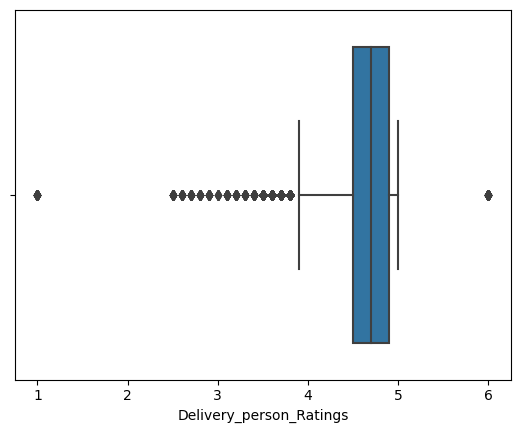

In [28]:
sns.boxplot(a['Delivery_person_Ratings'])

### Rating should be in range of 1 to 5

In [29]:
rating_median = a[a['Delivery_person_Ratings']<=5.0]['Delivery_person_Ratings'].median()

In [30]:
rating_median

4.7

### Replacing nan with median

In [31]:
a['Delivery_person_Ratings'] = a['Delivery_person_Ratings'].fillna(rating_median)

### there is one rating "6" with value count 53 need to be remove

In [26]:
# IQR
Q1 = np.percentile(a['Delivery_person_Ratings'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(a['Delivery_person_Ratings'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)
print
#  Upper bound
upper = (Q3+1.5*IQR)
print(upper)
#  Lower bound
lower = (Q1-1.5*IQR)
print(lower)


0.20000000000000018
4.6
4.8
5.1
4.299999999999999


C:\Users\ssaur\AppData\Local\Temp\ipykernel_8356\2702175779.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(a['Delivery_person_Ratings'], 25,
C:\Users\ssaur\AppData\Local\Temp\ipykernel_8356\2702175779.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(a['Delivery_person_Ratings'], 75,


In [27]:
a = a[a['Delivery_person_Ratings']>=lower]

In [28]:
a = a[a['Delivery_person_Ratings']<=upper]

## Working on Weather

In [32]:
a['Weather'].unique()

array(['Sunny', 'Stormy', 'Sandstorms', 'Cloudy', 'Fog', 'Windy', nan],
      dtype=object)

In [33]:
a['Weather'].value_counts()

Fog           7654
Stormy        7586
Cloudy        7536
Sandstorms    7495
Windy         7422
Sunny         7284
Name: Weather, dtype: int64

In [34]:
a['Weather'].mode()[0]

'Fog'

### Replacing nan with mode

In [35]:
a['Weather'] = a['Weather'].fillna(a['Weather'].mode()[0])

## Working on Road_traffic_density

In [36]:
a['Road_traffic_density'].unique()

array(['High', 'Jam', 'Low', 'Medium', nan], dtype=object)

In [37]:
a['Road_traffic_density'].mode()[0]

'Low'

### Replacing nan with mode & convert datatype to int

In [38]:
a['Road_traffic_density'] = a['Road_traffic_density'].fillna(a['Road_traffic_density'].mode()[0])

## Working on multiple_deliveries

In [39]:
a['multiple_deliveries'].unique()

array([ 0.,  1.,  3., nan,  2.])

In [40]:
a['multiple_deliveries'].isna().sum()

993

In [41]:
a['multiple_deliveries'].mode()[0]

1.0

In [42]:
a['multiple_deliveries'].value_counts()

1.0    28159
0.0    14095
2.0     1985
3.0      361
Name: multiple_deliveries, dtype: int64

### Replacing nan with mode

In [43]:
a['multiple_deliveries'] = a['multiple_deliveries'].fillna(a['multiple_deliveries'].mode()[0])

In [44]:
a['multiple_deliveries']= a['multiple_deliveries'].astype(int)

## Working on Festivals

In [45]:
a['Festival'].unique()

array(['No', 'Yes', nan], dtype=object)

In [46]:
a['Festival'].isna().sum()

228

In [47]:
a['Festival'].mode()[0]

'No'

### Replacing nan with mode

In [48]:
a['Festival'] = a['Festival'].fillna(a['Festival'].mode()[0])

## Working on City

In [49]:
a['City'].unique()

array(['Urban', 'Metropolitian', 'Semi-Urban', nan], dtype=object)

In [50]:
a['City'].isna().sum()

1200

In [51]:
a['City'].mode()[0]

'Metropolitian'

### Replacing nan with mode

In [52]:
a['City'] = a['City'].fillna(a['City'].mode()[0])

## Distance  calculation using latitude and longitude

In [61]:
a

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32.0
45589,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36.0
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16.0
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26.0


In [3]:
pip install osrm-py

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for osrm-py, since package 'wheel' is not installed.
  Running setup.py install for osrm-py: started
  Running setup.py install for osrm-py: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ssaur\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
import osrm

In [58]:
def calculate_dist_lat_long_osrm(la1,lo1,la2,lo2):
    osrm_client = osrm.Client(host='http://router.project-osrm.org')
    coordinates_osrm = [[lo1, la1], [lo2, la2]] # note that order is lon, lat
    
    if(la1>0.00):
        osrm_response = osrm_client.route(coordinates=coordinates_osrm, overview=osrm.overview.full)
        dist_osrm = osrm_response.get('routes')[0].get('distance')/1000 # in km
        print(dist_osrm)
        return dist_osrm
    else:
        return float('NaN')

In [5]:
osrm_client = osrm.Client(host='http://router.project-osrm.org')
coordinates_osrm = [[lon1, lat1], [lon2, lat2]] # note that order is lon, lat
    
osrm_response = osrm_client.route(coordinates=coordinates_osrm, overview=osrm.overview.full)
dist_osrm = osrm_response.get('routes')[0].get('distance')/1000 # in km
print('distance using OSRM: ', dist_osrm)

distance using OSRM:  4.2009


In [51]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ssaur\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [52]:
import geopy.distance

In [55]:
def calculate_dist_lat_long(la1,lo1,la2,lo2):
    coords_1 = (la1, lo1)
    coords_2 = (la2, lo2)
    print(la1,lo1,la2,lo2)
    if(la1>0.00):
        result = geopy.distance.great_circle(coords_1, coords_2).km
        return result
    else:
        return float('NaN')

In [62]:
a

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken
0,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0
1,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0
2,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0
3,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0
4,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32.0
45589,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36.0
45590,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16.0
45591,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26.0


In [59]:
a['total_distance_1']=np.vectorize(calculate_dist_lat_long_osrm)(a['Restaurant_latitude'],a['Restaurant_longitude'],a['Delivery_location_latitude'],a['Delivery_location_longitude'])

4.2009
4.2009
29.0535
5.1545
13.2057
7.097600000000001
9.775
19.090400000000002
26.7261
33.6163
11.767700000000001
8.354
21.4108
4.826
23.9853
21.8854
9.906799999999999
22.3964
18.389400000000002
6.0537
24.2182
25.3485
2.0022
21.762700000000002
9.050799999999999
16.7195
6.0261000000000005
18.7085
17.0898
20.5551
7.3933
9.717600000000001
12.944700000000001
8.309299999999999
26.1295
18.7043
8.544799999999999
1.6919000000000002
5.6463
4.9593
13.085600000000001
13.7796
18.8646
21.038400000000003
27.1799
4.8898
13.362200000000001
11.428
9.638
2.4301999999999997
8.281799999999999
23.6546
18.2529
14.2377
23.5235
16.780900000000003
1.7986
23.8968
5.882899999999999
16.440099999999997
33.018800000000006
8.6546
3.5052
20.6889
17.7687
8.553700000000001
7.687
8.6545
20.141299999999998
17.0622
17.792
8.8847
21.4805
22.8214
33.018800000000006
3.949
13.4903
10.236799999999999
8.350100000000001
13.9499
3.9165
27.7308
3.0589
4.2751
18.5308
23.8082
14.797799999999999
25.5611
9.6578
9.055200000000001
24.8

5.2414
18.3036
4.9798
17.947200000000002
8.1637
5.434699999999999
3.4192
6.7812
35.2865
25.1519
27.4877
16.729400000000002
10.5196
17.563
28.1402
43.749
2.7137
35.2865
12.93
12.3649
13.3431
17.2003
21.208599999999997
5.208
15.8589
2.4519
10.4946
13.145299999999999
33.4945
7.3568
21.4831
14.1727
11.1735
4.2853
3.4125
10.4875
13.195
24.510900000000003
17.797099999999997
4.2466
18.4399
16.5522
13.9088
13.8964
7.8527
28.495900000000002
21.6526
22.1769
18.6365
15.1221
8.4103
8.6546
3.3405
6.4781
24.2758
10.7265
29.189700000000002
11.906799999999999
23.5126
26.9481
17.4842
20.0669
4.4379
19.5611
17.976200000000002
21.1205
14.8409
5.6202
13.2774
23.254
27.1617
18.1307
9.705200000000001
4.3548
26.8925
25.7067
10.3209
4.1308
16.8639
14.8851
6.5143
11.8485
14.5663
33.920300000000005
14.7971
16.8803
4.0004
4.0066
11.0721
16.657700000000002
21.5445
3.7742
15.5274
21.329900000000002
17.576900000000002
17.9845
12.104
6.426699999999999
3.8903000000000003
6.099
19.4072
33.6795
31.1803
4.063
36.6522
19

8.653
18.2604
8.302
14.3689
8.0369
2.3814
18.8646
7.7088
24.393099999999997
4.6786
11.677100000000001
13.145299999999999
29.0535
23.127
2.7346999999999997
9.2159
21.9272
25.9667
8.4103
14.7666
3.944
14.6415
18.139400000000002
19.373
9.654399999999999
6.8935
5.1355
4.4144
3.6834000000000002
20.7395
18.876099999999997
6.354
7.7088
14.9107
17.007
20.0473
22.0315
8.3024
9.9719
7.6853
6.7812
18.7867
10.5619
13.8557
11.7644
16.3331
23.0876
28.988799999999998
3.9480999999999997
17.298
4.3051
41.7547
7.1522
6.5903
8.917399999999999
1.974
2.2083000000000004
14.3689
17.598200000000002
9.837399999999999
14.8286
9.9054
19.9189
23.6546
18.1053
18.6832
17.232599999999998
26.4436
4.3895
12.0167
11.6259
22.6665
4.2158
20.976
16.591
28.1821
3.9006999999999996
26.8521
7.076899999999999
30.515700000000002
18.4099
16.946099999999998
13.0152
5.8006
4.2453
14.726299999999998
10.8561
2.7346999999999997
18.4683
10.2
11.856399999999999
20.085099999999997
25.05
8.545
5.9047
8.7495
2.0864000000000003
5.0263
23.7

4.3768
25.951900000000002
14.517299999999999
21.9249
17.7435
54.037699999999994
10.024899999999999
11.7519
10.3209
5.3866000000000005
12.3379
6.426699999999999
14.3568
6.0537
3.7891
4.527399999999999
10.113100000000001
8.918899999999999
25.6005
20.9708
15.2864
20.5493
19.785700000000002
24.3648
4.304600000000001
2.3935999999999997
5.8919
14.912
13.9643
19.5847
5.551699999999999
25.4922
4.6861999999999995
24.8522
5.9593
10.5417
6.520899999999999
6.3934
18.9009
2.591
9.3035
23.788700000000002
19.3258
20.4473
14.130700000000001
16.6553
22.0267
18.5733
13.6241
9.3892
7.921
10.2441
17.548099999999998
11.4681
20.9459
17.8273
6.830100000000001
12.055399999999999
1.8978
32.078900000000004
11.7868
10.881200000000002
29.961599999999997
2.0359000000000003
2.2836999999999996
8.1878
1.8952
15.0801
23.623
18.8533
10.567
5.111
12.9116
13.9544
12.4967
12.273700000000002
2.3935999999999997
14.6138
25.2987
28.3774
13.7319
16.4444
14.8421
19.1513
16.0864
4.8507
9.705200000000001
26.9399
32.27690000000000

2.1566
39.000699999999995
24.316200000000002
16.6025
5.208
14.4082
18.9943
16.3366
22.0315
25.7067
2.4519
13.485
21.1263
18.4088
28.732200000000002
10.5429
25.507099999999998
21.9208
2.1338000000000004
36.895
17.300099999999997
12.6145
8.652
8.1706
13.532
16.673099999999998
29.3707
16.470200000000002
20.9827
9.2159
10.8701
10.1035
26.0033
8.407200000000001
14.1868
3.0335
4.769
13.2057
13.551200000000001
16.1958
21.162200000000002
26.5084
2.454
18.361
55.2112
5.0887
27.1022
5.8588000000000005
12.5417
41.765699999999995
32.078900000000004
10.5417
17.9845
2.0424
29.698700000000002
12.5831
12.1151
15.2158
2.6532
36.435
16.6627
32.8544
47.2464
7.6574
2.5978000000000003
2.1121
6.424
7.5108999999999995
2.0906
18.361
11.3349
9.912
8.0738
23.6356
8.723
3.9412
16.5758
4.2641
11.251700000000001
24.8953
15.3034
41.661699999999996
13.0351
15.2259
4.2962
6.767399999999999
5.1505
9.3525
5.142399999999999
2.4682
3.8354
19.3293
3.7129000000000003
24.531200000000002
11.0174
25.0341
6.927899999999999
8.1

5.4467
16.0507
14.212200000000001
6.1491999999999996
9.7145
17.5646
16.4924
7.9578
28.1948
9.4875
11.7817
6.3264
36.627300000000005
25.5855
6.5873
6.9846
15.5788
11.532200000000001
9.144
5.1505
3.2962
11.9869
10.7771
6.3342
6.565600000000001
13.8964
17.6038
7.9863
17.688200000000002
15.679799999999998
12.4169
33.4025
4.2725
11.0184
11.8264
30.3883
20.0409
19.3538
8.881200000000002
3.0589
25.794
2.3070999999999997
13.960799999999999
5.2414
6.2387
11.3349
11.177700000000002
2.4443
19.2821
17.1951
26.1295
5.5108999999999995
14.517299999999999
19.487
4.2381
13.1727
8.6546
10.453299999999999
13.5831
21.746
7.4172
12.7921
25.7461
15.7709
24.82
16.727700000000002
8.8696
19.8639
8.2215
8.1057
5.6544
18.5254
24.294
16.591
12.4604
19.526
23.0747
20.997
16.4947
25.5885
21.7878
7.1182
21.019
12.4604
11.4993
22.4767
4.3895
14.4356
20.569
8.1637
8.9536
15.3469
25.2987
12.583
5.569
10.7637
12.1168
4.2962
6.935899999999999
4.9235
8.652299999999999
14.1474
9.594899999999999
6.9461
3.7624
2.0695
10.1765

15.989700000000001
11.017
2.2836999999999996
14.5711
20.0065
12.0014
7.3123000000000005
27.6958
21.220299999999998
6.030600000000001
18.301
21.5365
24.3648
17.809099999999997
13.766
5.9636000000000005
6.7329
2.2095
22.3685
27.2989
10.3024
20.5642
6.329
15.1673
9.572299999999998
16.456400000000002
4.6861999999999995
5.9593
23.6546
24.510900000000003
16.773799999999998
18.0485
14.5441
7.5037
4.2641
12.151200000000001
2.0782
18.4399
3.9981
19.1412
28.1889
6.056
8.223600000000001
21.943099999999998
12.3612
31.8023
15.351
19.373
22.8672
4.5963
13.551200000000001
3.0589
8.6768
17.4845
9.8796
18.7467
17.0898
9.116299999999999
25.794
9.6697
21.894099999999998
24.786
2.2916999999999996
4.4405
25.723200000000002
14.6982
6.743600000000001
8.2087
27.5913
25.7569
4.789
12.260299999999999
24.9931
15.9536
3.3954
8.477799999999998
13.320799999999998
25.0536
19.545900000000003
31.4228
2.8171
22.803900000000002
17.4466
2.1557
5.2414
8.5142
23.148799999999998
2.4099
10.8527
9.6429
4.936
17.3093
16.105700

10.0214
5.7762
8.544799999999999
6.8696
5.7512
15.7947
15.77
16.8785
17.300099999999997
14.0395
7.9957
7.3933
14.2404
1.6435
13.9934
20.0179
3.3405
20.703
14.897
2.2669
1.9725
4.2489
6.3963
15.4139
21.8579
8.881200000000002
17.0742
8.6373
10.049700000000001
26.6154
20.5645
12.2919
16.3543
15.888
20.544900000000002
17.061700000000002
10.0046
5.8597
9.6578
8.2051
19.763
3.8327
6.743600000000001
31.4228
1.9352
16.7793
11.7817
25.0571
23.9778
24.403299999999998
18.967299999999998
17.576900000000002
8.6928
28.6802
33.6736
6.8103
3.1714
18.4857
3.1531
16.9713
9.897200000000002
13.4852
6.0811
10.251700000000001
29.671400000000002
23.9498
16.035
6.253100000000001
14.463
15.740200000000002
4.1789
3.6834000000000002
34.531400000000005
15.973
6.1245
21.8854
13.1578
1.957
2.5507
12.7971
3.9165
6.3264
8.8578
8.7495
17.9627
20.5493
20.2043
9.4121
17.8766
23.3175
20.1109
3.4596
11.642100000000001
14.212200000000001
22.803900000000002
21.926
14.932799999999999
15.2288
22.091
2.2684
12.2135
18.5733
11.

9.697299999999998
26.328599999999998
10.453299999999999
2.0658000000000003
22.3607
15.212200000000001
24.0293
7.5828
30.7357
6.214600000000001
14.2414
11.0517
19.9795
19.2562
10.3245
10.049700000000001
19.526799999999998
3.6591
11.699
21.1205
4.0923
28.216099999999997
5.4927
9.1223
21.2656
55.3575
17.0635
4.5085
8.2051
25.1624
16.7303
27.2298
4.0929
6.51
14.1727
19.3115
10.739600000000001
10.049700000000001
2.7183
23.7946
36.7987
3.9319
20.6085
16.200200000000002
9.837399999999999
16.1915
11.0778
13.3013
3.2236
7.9864
8.8615
3.5362
15.851600000000001
2.7186
11.6775
7.177899999999999
11.0674
7.6135
16.9595
5.9397
19.2075
17.688200000000002
27.3672
28.5141
31.4228
17.4086
17.1113
25.412
25.8451
2.6702
9.3354
11.270700000000001
5.0482
8.4103
5.958699999999999
11.046
27.807
15.5788
7.4496
8.108
3.9165
12.5505
10.5942
24.770799999999998
2.454
19.526799999999998
2.2343
9.055200000000001
2.0277
27.8676
28.4375
12.428799999999999
22.7607
19.4161
16.987
25.951900000000002
14.0159
19.3258
17.498

27.1022
4.1653
14.7234
6.0043
17.2115
3.7129000000000003
4.6258
4.3895
7.3445
10.9805
7.4322
7.7201
2.0039000000000002
11.2132
21.706599999999998
13.233600000000001
14.819799999999999
7.3213
10.3612
4.295100000000001
10.3522
19.0229
9.7715
16.0273
15.6361
21.943099999999998
12.2482
11.1735
21.6665
12.4698
13.8258
25.877299999999998
8.6768
18.7967
16.7595
13.0613
14.0354
13.1656
20.9459
2.4417
5.9397
2.2276
13.7796
17.03
10.9915
12.944799999999999
9.675799999999999
17.1951
2.0658000000000003
26.5183
7.5807
8.5619
12.8527
4.8398
17.6509
21.528299999999998
15.984
14.181700000000001
18.0014
2.1414
26.9399
27.6958
2.2498
33.307
15.351
15.7187
11.7069
17.5183
2.591
12.443299999999999
17.9336
6.535399999999999
21.189799999999998
17.426099999999998
2.7716999999999996
19.2544
10.5189
28.1948
10.6599
13.014700000000001
8.163
16.2455
2.315
17.344
13.9544
35.1413
5.412100000000001
11.5179
5.5697
8.163
19.2562
29.0535
22.1797
22.8488
31.8023
13.1578
20.128400000000003
18.3263
27.1799
24.82
9.233799

2.2343
12.8989
20.4437
6.5143
13.572799999999999
2.2869
14.352
14.6539
15.351
15.3804
11.428
22.425900000000002
8.7699
11.402299999999999
3.3405
13.504100000000001
12.9611
20.9827
23.646099999999997
9.949399999999999
1.8126
15.2158
36.535
24.2182
2.4343000000000004
5.2023
13.792399999999999
15.256200000000002
2.3654
7.944
9.0644
11.6961
12.2928
28.5445
18.1489
20.7365
122.1426
19.8358
32.8544
8.7838
17.4467
19.553900000000002
11.8768
12.6011
18.2529
18.9038
26.5671
23.3042
18.242900000000002
10.0864
18.3263
21.3977
18.4099
18.3127
2.5438
19.7758
8.950299999999999
26.649099999999997
24.403299999999998
23.254
9.2666
10.819799999999999
19.9387
20.0065
4.489199999999999
22.691
12.1987
3.7415
6.4953
14.798200000000001
8.6552
2.3935
24.2182
17.6274
26.170900000000003
10.4856
18.452900000000003
4.7176
11.750399999999999
12.443299999999999
1.9949000000000001
16.8586
10.0726
16.729400000000002
12.0656
10.210799999999999
8.0288
10.1868
9.546299999999999
5.959899999999999
10.913
12.93
13.586
6.83

15.212200000000001
14.0891
9.638
14.8162
27.1022
15.1304
14.6646
21.2656
18.1264
24.9931
14.1063
3.8354
17.8391
5.2023
26.0936
7.937600000000001
9.2102
5.2427
2.389
16.1417
2.2083000000000004
14.1358
27.4877
15.8714
22.1719
16.1687
23.8008
16.6672
11.4858
13.2774
6.3963
25.6337
14.547600000000001
13.7559
7.870100000000001
20.2043
19.7576
11.5677
18.9683
23.8138
19.133599999999998
5.9397
5.0554
10.0864
13.551200000000001
2.2197
11.2132
18.9452
1.9872
13.7611
7.7437
8.3845
4.4405
9.6532
19.2628
24.3033
25.0341
20.7365
26.8521
11.3315
16.0958
12.0824
3.9165
13.7847
7.0375
16.3331
24.627200000000002
12.7667
10.5061
18.2529
19.4161
4.3325
2.3125
2.1574
2.975
26.4172
2.9618
17.7435
24.890700000000002
24.0098
30.5655
21.1006
1.973
39.9766
8.6546
16.559099999999997
26.0928
13.4852
26.1295
15.2542
13.1822
24.8522
15.0959
12.1042
2.7847
16.7595
14.7698
8.392
13.9186
15.5855
2.2095
14.6646
2.7825
6.1373
6.3335
13.6241
20.7383
3.7415
33.56
18.0177
7.6128
15.5492
7.4031
5.0263
2.7183
9.233799999999

16.5758
4.1338
2.0646
14.7767
19.133599999999998
37.782300000000006
21.4805
12.260299999999999
8.063699999999999
12.6678
11.7422
11.3913
9.9274
9.546299999999999
8.917399999999999
8.1583
29.4938
1.8705999999999998
5.662100000000001
5.794
10.2002
6.482399999999999
30.5156
33.6736
8.1008
14.352
22.988599999999998
3.1066
28.5445
11.8285
23.5029
2.7775
10.921700000000001
22.7607
10.3245
11.428
3.6221
7.9585
16.4555
10.0915
15.5001
6.935899999999999
10.834200000000001
16.5595
6.913
13.132700000000002
5.759399999999999
19.553900000000002
26.667099999999998
4.0732
11.1277
1.954
2.0449
11.4993
9.897200000000002
16.0518
29.698700000000002
17.0622
4.1566
4.769
24.303900000000002
17.4842
2.3022
20.9172
14.4792
5.3866000000000005
13.1258
29.8558
8.9536
16.0864
11.9175
22.9865
24.627200000000002
8.9481
2.2426999999999997
16.035
21.8236
17.6315
11.1883
15.762799999999999
21.206
10.086799999999998
12.8989
10.1422
16.9623
11.2081
4.63
14.130700000000001
13.1344
10.9233
16.591
2.5254000000000003
9.5948

16.3331
2.3022
16.729400000000002
10.644
15.3226
9.1459
22.963900000000002
2.5507
16.4913
10.4179
4.9959
14.44
16.0864
15.4252
24.408099999999997
16.7353
18.967299999999998
14.829799999999999
6.1396999999999995
17.9503
15.296700000000001
2.0846999999999998
4.2768999999999995
10.2168
29.2538
7.3213
18.6561
18.1668
16.547400000000003
15.494299999999999
19.7928
19.6528
13.2805
4.2381
9.2642
16.8586
26.0336
16.055600000000002
10.9915
12.6145
15.914100000000001
11.6961
21.559900000000003
20.614099999999997
1.9087
25.859599999999997
21.9419
13.366700000000002
1.8952
16.507099999999998
24.246
52.6316
8.9937
7.9511
4.3763000000000005
4.2725
5.5697
23.5218
16.9083
12.4698
3.9238000000000004
15.622399999999999
5.0263
7.7293
8.8773
17.7604
8.1128
1.9725
2.3457
6.9186000000000005
13.4527
27.1799
17.6143
21.5484
6.1096
5.9171000000000005
15.7404
3.3405
23.3175
7.097600000000001
22.400299999999998
5.9372
19.589
10.8107
4.961
1.9554
13.4903
4.543
24.187
5.4995
4.0156
24.4941
5.0263
2.9061
33.6163
4.0

28.6802
7.4322
1.8918
17.932299999999998
3.4893
30.0224
5.7762
2.9285
3.7979000000000003
21.038400000000003
6.8633999999999995
15.3818
12.4165
28.9788
18.0404
7.406
16.780900000000003
27.4741
20.4363
6.7465
24.1049
14.6445
26.0033
20.0409
16.6627
12.443299999999999
1.973
12.683399999999999
8.9955
14.798200000000001
17.1516
7.609
19.1486
6.865600000000001
12.1655
7.0468
5.857399999999999
21.5891
24.073
8.950299999999999
20.668200000000002
4.4929
14.4668
43.749
8.825899999999999
9.546299999999999
6.641100000000001
10.44
13.366700000000002
27.2427
18.1053
7.527399999999999
4.3471
8.6594
30.956799999999998
14.5441
21.7207
7.9578999999999995
17.4912
5.5499
5.291399999999999
9.700899999999999
9.572299999999998
9.050799999999999
17.3893
17.4912
12.0163
15.132
14.632
12.2211
13.3913
10.122399999999999
17.640400000000003
17.8391
9.912
22.8682
13.366700000000002
25.5845
3.9480999999999997
11.249799999999999
4.9235
5.8588000000000005
11.066
19.090400000000002
24.393099999999997
25.0643
21.5118
4.

20.4473
17.2003
6.4105
11.3251
29.996299999999998
11.251700000000001
23.566200000000002
4.9959
20.662599999999998
3.6591
18.4432
9.2622
10.9233
11.3102
16.0864
4.4405
22.988599999999998
6.011100000000001
24.2483
15.1782
28.985
16.606099999999998
29.5029
30.0224
21.1029
17.2667
17.6662
17.4467
8.2051
11.2205
2.0394
10.1883
19.6128
9.116299999999999
9.8043
1.7872000000000001
2.5775
16.8803
22.8995
10.024899999999999
12.104
17.298
23.2788
14.1727
3.1349
7.9863
16.0273
33.6736
3.3954
14.2276
21.310599999999997
3.1425
25.605700000000002
10.455
8.5619
18.6561
18.9943
22.1519
17.1595
21.8579
14.8655
12.607700000000001
8.9937
20.6222
17.0972
17.2458
24.950200000000002
12.428799999999999
4.304600000000001
10.9915
6.563
4.002800000000001
20.544900000000002
18.8905
26.524
21.7904
25.412
8.6545
16.9313
4.7313
7.4554
10.7466
17.1113
20.976
27.4512
14.4792
14.2377
23.6546
15.3888
8.545
4.0923
28.4375
19.8358
14.3689
1.6358
12.7214
8.2698
16.7793
12.0656
9.834299999999999
7.7293
9.089
19.6128
21.5484

22.4767
12.0163
11.4645
3.9611
15.3804
10.866299999999999
17.836599999999997
24.806900000000002
34.313300000000005
4.7313
16.470200000000002
4.7176
5.434699999999999
23.9213
25.3485
7.138199999999999
16.0244
13.1656
8.258
12.162
12.3333
13.485
27.2427
15.531
4.857600000000001
7.6162
15.014700000000001
12.1151
11.4993
11.4964
18.452900000000003
17.389599999999998
11.3102
25.3225
21.0905
11.5335
5.3866000000000005
23.254
4.8712
2.7346999999999997
4.6786
28.2853
24.5285
2.3041
8.6594
25.605700000000002
12.992299999999998
2.0175
6.011100000000001
3.5513000000000003
17.4419
10.3554
13.4264
2.8171
18.7867
3.3405
23.9778
18.5905
16.9998
6.535399999999999
19.4432
4.8712
4.112
14.912
12.8851
27.8751
2.0022
12.0122
13.7186
16.6553
24.0293
26.747
24.2715
17.3227
1.8952
12.2928
26.018099999999997
33.461400000000005
18.389400000000002
26.5894
24.316200000000002
25.0536
24.86
11.9215
23.4739
12.392
13.9705
8.063699999999999
17.9845
8.825899999999999
9.0148
11.5051
9.050799999999999
16.1331
15.0606
4

6.767399999999999
24.976200000000002
31.152099999999997
16.0273
33.2185
8.553700000000001
2.2863
8.0753
14.9946
23.926099999999998
19.545900000000003
33.274300000000004
22.544900000000002
11.3669
10.2051
11.2064
23.254
20.9942
10.543
8.2215
24.1049
7.4898
7.8546000000000005
7.21
14.2276
11.6775
13.320799999999998
11.386700000000001
10.5189
17.3613
13.8596
16.693099999999998
20.1692
23.9213
4.262
2.0864000000000003
9.3574
25.8451
27.3813
18.095299999999998
12.1987
5.503
16.2742
12.7951
3.8735999999999997
6.8696
13.229700000000001
24.736900000000002
15.6357
11.6927
13.289299999999999
2.2276
6.7465
25.228
14.1868
9.4121
14.4244
2.2456
15.6361
23.646099999999997
11.5179
6.1737
21.208599999999997
5.0862
22.6665
20.5152
10.3965
14.2377
17.2667
13.4037
32.4066
2.454
14.1996
2.5874
21.310599999999997
2.4099
12.944799999999999
21.1263
20.9073
2.583
14.4356
1.9842
29.6687
10.8948
25.228
2.0277
9.8759
10.1876
24.1049
20.7395
17.518099999999997
10.7754
3.944
8.7375
21.9087
8.8278
18.388
8.65679999

ConnectionError: HTTPConnectionPool(host='router.project-osrm.org', port=80): Max retries exceeded with url: /route/v1/driving/80.219104,13.091809;80.289104,13.161809?alternatives=false&steps=false&annotations=false&geometries=geojson&overview=full (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000208AB2AC6A0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

In [63]:
sns.boxplot(a['total_distance1'])

KeyError: 'total_distance1'

### Dropping nan row 

In [56]:
a = a[~a['total_distance'].isna()]

In [57]:
a['total_distance'].mean()

9.550368813911929

In [58]:
a['total_distance'] = a['total_distance'].fillna(a['total_distance'].mean())

C:\Users\ssaur\AppData\Local\Temp\ipykernel_8356\1214026747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['total_distance'] = a['total_distance'].fillna(a['total_distance'].mean())


## Working on Vehicle_condition

In [59]:
a['Vehicle_condition'].unique()

array([2, 0, 1, 3], dtype=int64)

## Working on time taken column -target Column

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time_taken'>

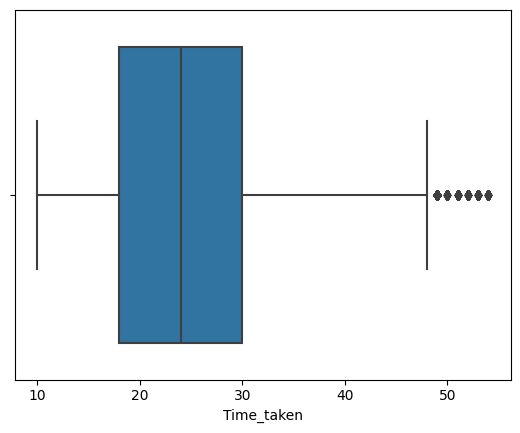

In [60]:
sns.boxplot(a['Time_taken'])

#### Outlier is valid,because it depend on many factor like vehicle cond=0,traffic_density=jam,distance is high

In [61]:
a[a['Time_taken']>47]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,total_distance
43,SURRES17DEL03,37,4.7,21.149569,72.772697,21.239569,72.862697,Sandstorms,Jam,0,Snack,motorcycle,3,No,Metropolitian,52.0,13.682536
126,RANCHIRES04DEL01,33,4.7,23.359033,85.325347,23.469033,85.435347,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,49.0,16.600999
165,HYDRES18DEL03,35,4.8,17.450851,78.379347,17.540851,78.469347,Fog,Medium,0,Meal,motorcycle,3,No,Metropolitian,48.0,13.829334
188,MYSRES04DEL03,38,4.3,12.308500,76.665808,12.398500,76.755808,Sandstorms,Jam,0,Meal,motorcycle,1,Yes,Semi-Urban,54.0,13.989937
266,AGRRES03DEL01,35,4.9,27.160832,78.011608,27.230832,78.081608,Cloudy,Jam,0,Buffet,motorcycle,2,No,Metropolitian,53.0,10.417081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45305,SURRES19DEL01,35,4.7,21.149669,72.772629,21.219669,72.842629,Cloudy,Jam,0,Meal,motorcycle,1,No,Metropolitian,51.0,10.642304
45448,MYSRES17DEL03,37,4.6,12.326356,76.619103,12.416356,76.709103,Windy,Jam,0,Snack,motorcycle,1,Yes,Semi-Urban,53.0,13.989470
45468,SURRES07DEL01,30,4.9,21.170798,72.790489,21.240798,72.860489,Stormy,Jam,0,Drinks,motorcycle,2,Yes,Semi-Urban,48.0,10.641596
45526,JAPRES18DEL01,30,4.7,26.913987,75.752891,27.023987,75.862891,Cloudy,Jam,2,Snack,scooter,0,No,Metropolitian,48.0,16.384357


## Dropping Column Type Of Order

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_order', ylabel='Time_taken'>

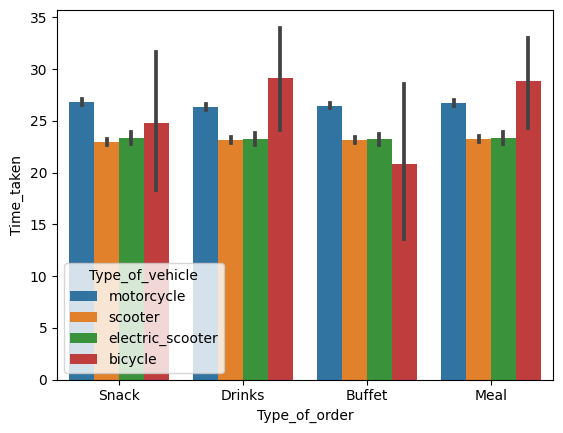

In [62]:
sns.barplot(a['Type_of_order'],a['Time_taken'],hue = a['Type_of_vehicle'])

In [63]:
a = a.drop(columns=['Type_of_order'])

## Dropping the restaurant and delivery location latitude ,longitude column

In [64]:
a = a.drop(columns=['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])

In [65]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36602 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_ID       36602 non-null  object 
 1   Delivery_person_Age      36602 non-null  int32  
 2   Delivery_person_Ratings  36602 non-null  float64
 3   Weather                  36602 non-null  object 
 4   Road_traffic_density     36602 non-null  object 
 5   Vehicle_condition        36602 non-null  int64  
 6   Type_of_vehicle          36602 non-null  object 
 7   multiple_deliveries      36602 non-null  int32  
 8   Festival                 36602 non-null  object 
 9   City                     36602 non-null  object 
 10  Time_taken               36602 non-null  float64
 11  total_distance           36602 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 3.4+ MB


# Studying data using plot

In [66]:
a.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken,total_distance
count,36602.000000,36602.000000,36602.000000,36602.000000,36602.000000,36602.000000
mean,29.309573,4.724594,1.033823,0.725807,25.131851,9.550369
std,5.642325,0.176115,0.827456,0.553476,9.022610,5.582812
min,20.000000,4.300000,0.000000,0.000000,10.000000,1.465069
25%,24.000000,4.600000,0.000000,0.000000,18.000000,4.656909
50%,29.000000,4.700000,1.000000,1.000000,24.000000,9.121504
75%,34.000000,4.900000,2.000000,1.000000,30.000000,13.611274
max,39.000000,5.000000,3.000000,3.000000,54.000000,20.969519


In [67]:
a.corr()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken,total_distance
Delivery_person_Age,1.000000,-0.057123,-0.007831,0.109963,0.285170,-0.023707
Delivery_person_Ratings,-0.057123,1.000000,0.056855,-0.044222,-0.152819,-0.024819
Vehicle_condition,-0.007831,0.056855,1.000000,-0.104910,-0.271405,-0.035299
multiple_deliveries,0.109963,-0.044222,-0.104910,1.000000,0.370429,0.116693
Time_taken,0.285170,-0.152819,-0.271405,0.370429,1.000000,0.304089
total_distance,-0.023707,-0.024819,-0.035299,0.116693,0.304089,1.000000


C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

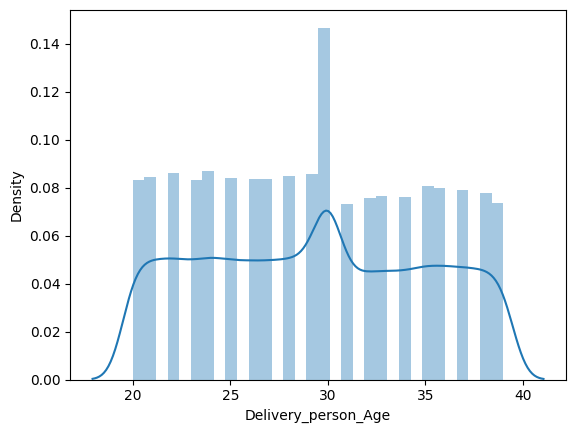

In [68]:
sns.distplot(a['Delivery_person_Age'])

(array([11954., 24648.]),
 array([4.3 , 4.65, 5.  ]),
 <BarContainer object of 2 artists>)

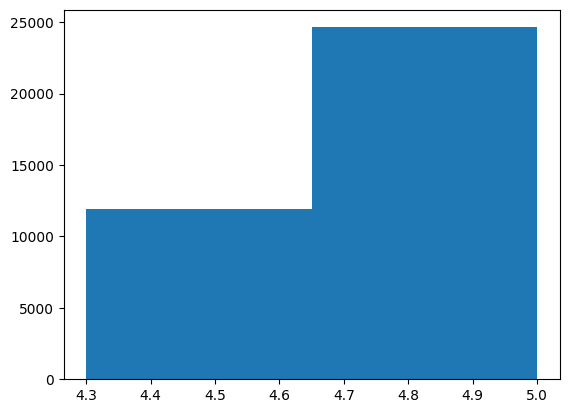

In [69]:
plt.hist(a['Delivery_person_Ratings'],bins=2)

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Age'>

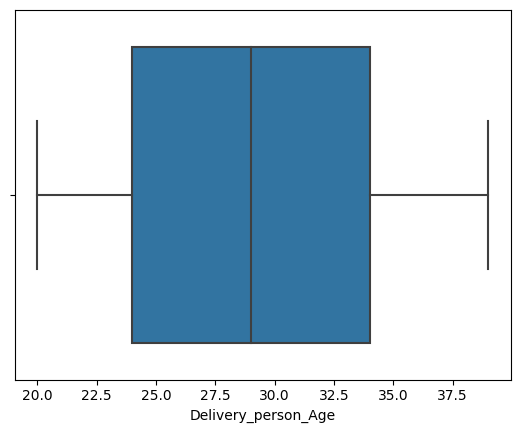

In [70]:
sns.boxplot(a['Delivery_person_Age'])

#### from above Delivery_person_Ratings plot,has outlier,but it represent natural variation, so,we can keep it

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Ratings'>

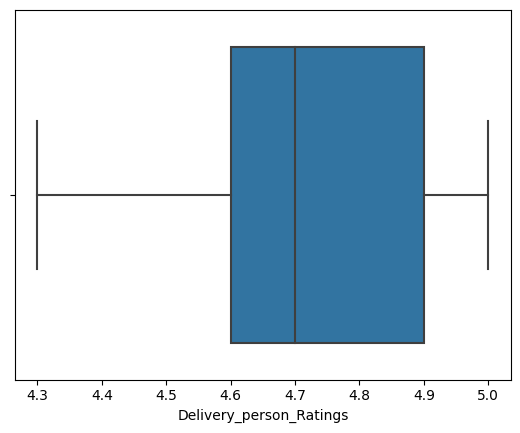

In [71]:
sns.boxplot(a['Delivery_person_Ratings'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time_taken'>

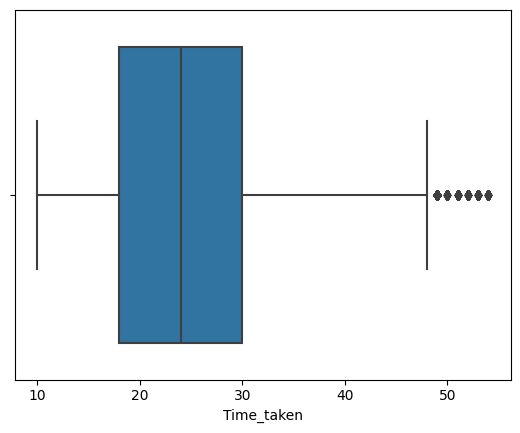

In [72]:
sns.boxplot(a['Time_taken'])

In [73]:
a[a['Time_taken']>50]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,total_distance
43,SURRES17DEL03,37,4.7,Sandstorms,Jam,0,motorcycle,3,No,Metropolitian,52.0,13.682536
188,MYSRES04DEL03,38,4.3,Sandstorms,Jam,0,motorcycle,1,Yes,Semi-Urban,54.0,13.989937
266,AGRRES03DEL01,35,4.9,Cloudy,Jam,0,motorcycle,2,No,Metropolitian,53.0,10.417081
722,HYDRES06DEL01,31,4.4,Stormy,Jam,0,motorcycle,1,Yes,Metropolitian,53.0,10.756289
778,RANCHIRES06DEL01,20,4.5,Sunny,High,0,motorcycle,1,No,Metropolitian,51.0,6.037483
...,...,...,...,...,...,...,...,...,...,...,...,...
45043,MUMRES15DEL02,39,4.4,Sandstorms,Jam,0,motorcycle,1,No,Metropolitian,54.0,12.234839
45231,HYDRES08DEL02,35,4.9,Cloudy,Jam,0,motorcycle,1,No,Semi-Urban,51.0,19.975315
45294,JAPRES07DEL02,39,4.4,Sandstorms,Jam,0,motorcycle,1,No,Metropolitian,53.0,19.373773
45305,SURRES19DEL01,35,4.7,Cloudy,Jam,0,motorcycle,1,No,Metropolitian,51.0,10.642304


#### From this plot i can find

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_condition', ylabel='Time_taken'>

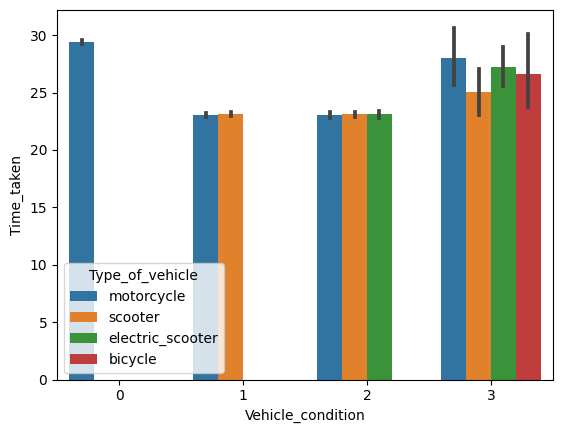

In [74]:
sns.barplot(a['Vehicle_condition'],a['Time_taken'],hue = a['Type_of_vehicle'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type_of_vehicle', ylabel='Time_taken'>

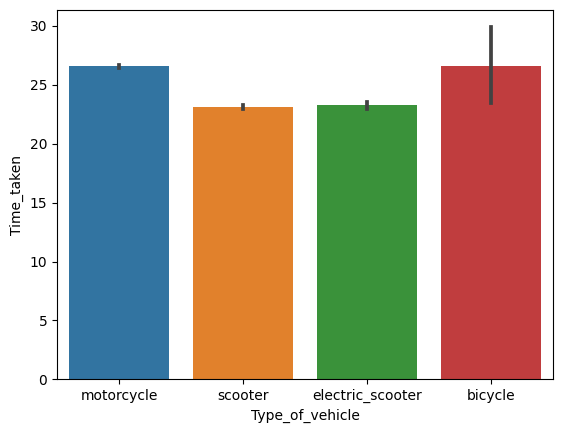

In [75]:
sns.barplot(a['Type_of_vehicle'],a['Time_taken'] )

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Road_traffic_density', ylabel='Time_taken'>

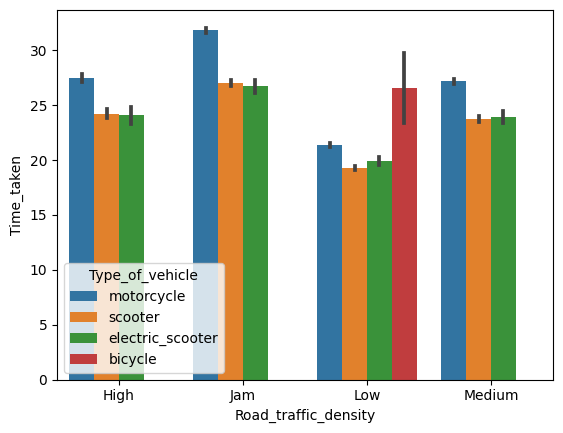

In [76]:
sns.barplot(a['Road_traffic_density'],a['Time_taken'],hue = a['Type_of_vehicle'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='multiple_deliveries', ylabel='Time_taken'>

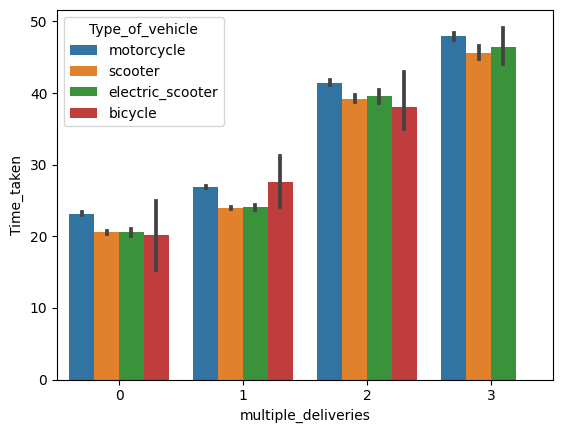

In [77]:
sns.barplot(a['multiple_deliveries'],a['Time_taken'],hue = a['Type_of_vehicle'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Festival', ylabel='Time_taken'>

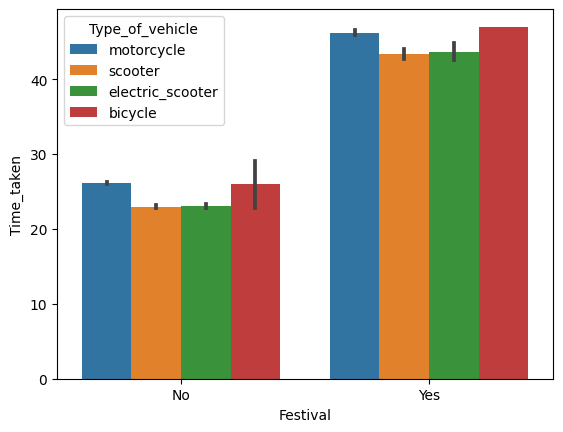

In [78]:
sns.barplot(a['Festival'],a['Time_taken'],hue = a['Type_of_vehicle'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City', ylabel='Time_taken'>

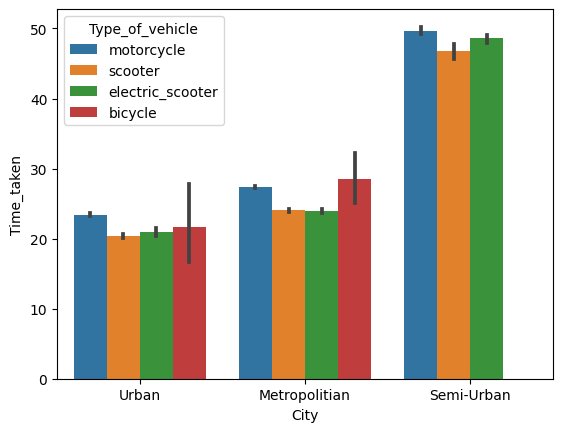

In [79]:
sns.barplot(a['City'],a['Time_taken'],hue = a['Type_of_vehicle'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weather', ylabel='Time_taken'>

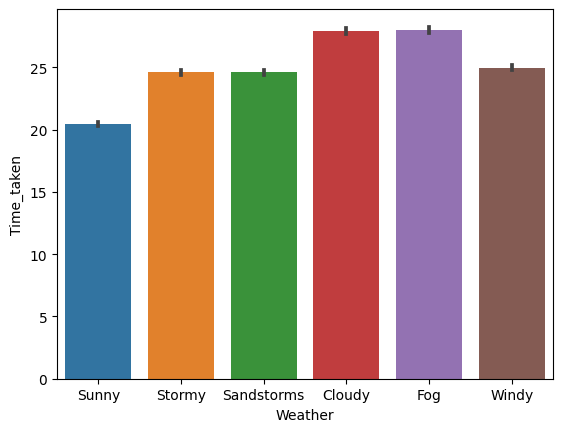

In [100]:
sns.barplot(a['Weather'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_condition', ylabel='Time_taken'>

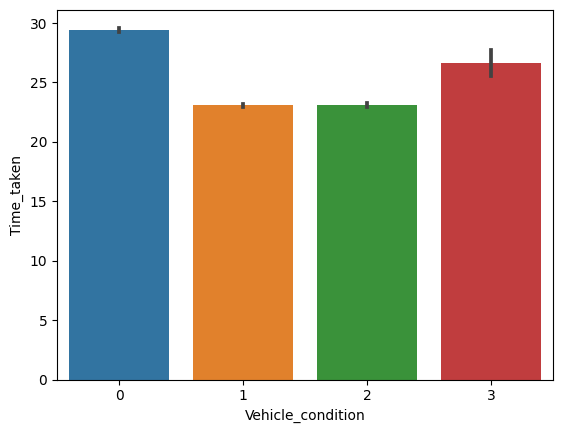

In [101]:
sns.barplot(a['Vehicle_condition'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Time_taken'>

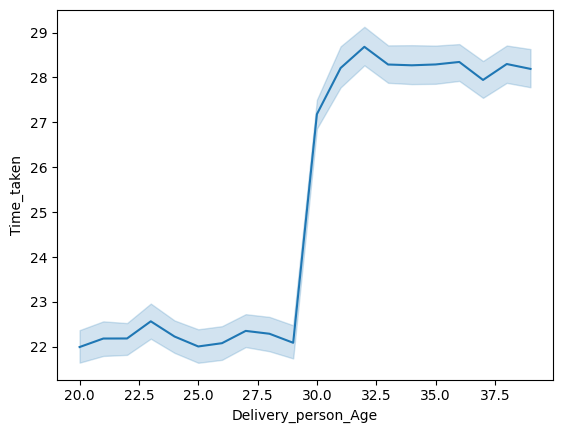

In [83]:
sns.lineplot(a['Delivery_person_Age'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_person_Ratings', ylabel='Time_taken'>

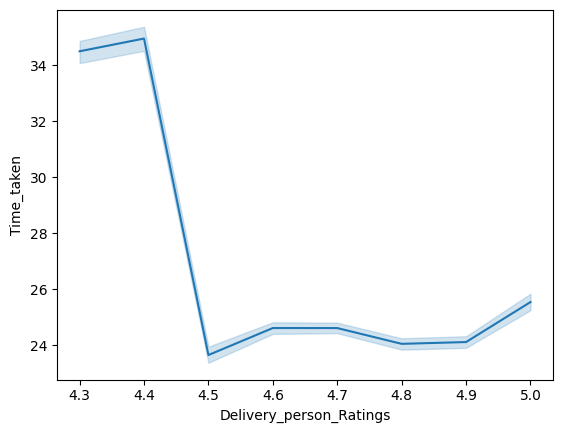

In [734]:
sns.lineplot(a['Delivery_person_Ratings'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyboardInterrupt: 

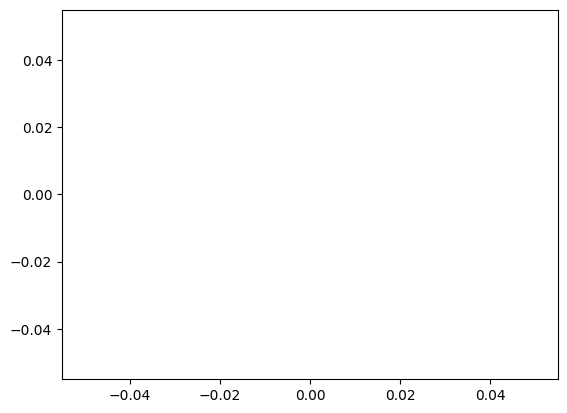

In [84]:
sns.lineplot(a['total_distance'],a['Time_taken'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_person_Age', ylabel='Density'>

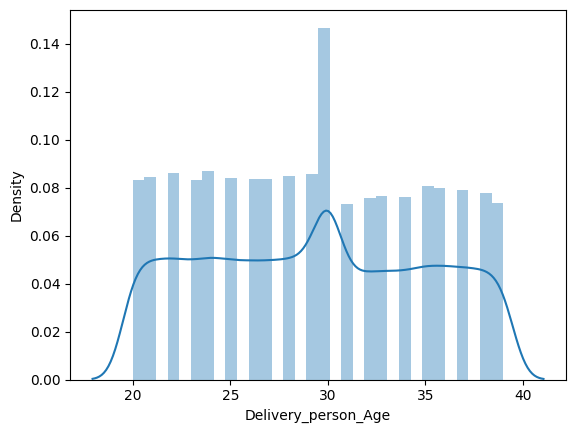

In [85]:
sns.distplot(a['Delivery_person_Age'])

In [299]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_ID       45593 non-null  object 
 1   Delivery_person_Age      45593 non-null  int32  
 2   Delivery_person_Ratings  45593 non-null  float64
 3   Weather                  45593 non-null  object 
 4   Road_traffic_density     45593 non-null  object 
 5   Vehicle_condition        45593 non-null  int64  
 6   Type_of_vehicle          45593 non-null  object 
 7   multiple_deliveries      45593 non-null  int32  
 8   Festival                 45593 non-null  object 
 9   City                     45593 non-null  object 
 10  Time_taken               45593 non-null  float64
 11  total_distance           45593 non-null  float64
dtypes: float64(3), int32(2), int64(1), object(6)
memory usage: 3.8+ MB


In [311]:
from sklearn.compose import ColumnTransformer
#2nd OrdinalEncoder
trf2 = ColumnTransformer([
    
    ('od_w',OrdinalEncoder(categories=[['Fog','Cloudy','Windy','Sandstorms','Stormy','Sunny']]),[0]),
    ('od_rtd',OrdinalEncoder(categories=[['Jam','High','Medium','Low']]),[1]),
    ('od_tov',OrdinalEncoder(categories=[['motorcycle','scooter', 'electric_scooter', 'bicycle']]),[2]),
    ('od_c',OrdinalEncoder(categories=[['Semi-Urban', 'Metropolitian', 'Urban']]),[3]),
    ('of_f',OrdinalEncoder(categories=[['Yes','No']]),[4])
        ])

In [308]:
a[['Weather','Road_traffic_density','Type_of_vehicle','City','Festival']]

,Weather,Road_traffic_density,Type_of_vehicle,City,Festival
0,Sunny,High,motorcycle,Urban,No
1,Stormy,Jam,scooter,Metropolitian,No
2,Sandstorms,Low,motorcycle,Urban,No
3,Sunny,Medium,motorcycle,Metropolitian,No
4,Cloudy,High,scooter,Metropolitian,No
...,...,...,...,...,...
45588,Windy,High,motorcycle,Metropolitian,No
45589,Windy,Jam,motorcycle,Metropolitian,No
45590,Cloudy,Low,scooter,Metropolitian,No
45591,Cloudy,High,motorcycle,Metropolitian,No


In [314]:
trf2.fit_transform(a[['Weather','Road_traffic_density','Type_of_vehicle','City','Festival']])

array([[5., 1., 0., 2., 1.],
       [4., 0., 1., 1., 1.],
       [3., 3., 0., 2., 1.],
       ...,
       [1., 3., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [0., 2., 1., 1., 1.]])

In [88]:
a = a.reset_index(drop=True)

# Model

In [286]:
X = a.drop(columns=['Time_taken','Delivery_person_ID'])
y = a['Time_taken']

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [288]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [289]:
oe = OrdinalEncoder(categories=[['Jam','High','Medium','Low'],['Fog','Cloudy','Windy','Sandstorms','Stormy','Sunny'],['motorcycle','scooter', 'electric_scooter', 'bicycle'],['Semi-Urban', 'Metropolitian', 'Urban'],['Yes','No']])

In [290]:
oe.fit(X_train[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']])

OrdinalEncoder(categories=[['Jam', 'High', 'Medium', 'Low'],
                           ['Fog', 'Cloudy', 'Windy', 'Sandstorms', 'Stormy',
                            'Sunny'],
                           ['motorcycle', 'scooter', 'electric_scooter',
                            'bicycle'],
                           ['Semi-Urban', 'Metropolitian', 'Urban'],
                           ['Yes', 'No']])

In [291]:
X_train[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']]= oe.transform(X_train[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']])

In [292]:
X_test[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']]= oe.transform(X_test[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']])

In [219]:
oe.categories_

[array(['Jam', 'High', 'Medium', 'Low'], dtype=object),
 array(['Fog', 'Cloudy', 'Windy', 'Sandstorms', 'Stormy', 'Sunny'],
       dtype=object),
 array(['motorcycle', 'scooter', 'electric_scooter', 'bicycle'],
       dtype=object),
 array(['Semi-Urban', 'Metropolitian', 'Urban'], dtype=object),
 array(['Yes', 'No'], dtype=object)]

In [220]:
X_train

,Delivery_person_Age,Delivery_person_Ratings,Weather,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,total_distance
25916,23,4.7,0.0,2.0,1,0.0,1,1.0,1.0,10.906448
3349,22,4.8,3.0,0.0,2,1.0,1,1.0,1.0,12.074413
9809,22,4.7,0.0,1.0,2,2.0,0,1.0,2.0,6.128908
18723,26,5.0,0.0,0.0,2,1.0,1,1.0,2.0,19.043099
27400,25,4.5,5.0,2.0,0,0.0,0,1.0,1.0,8.929016
...,...,...,...,...,...,...,...,...,...,...
27671,29,4.5,0.0,1.0,2,1.0,0,1.0,1.0,6.118754
21808,34,4.5,4.0,3.0,2,0.0,0,1.0,1.0,19.879899
7290,26,4.8,1.0,3.0,0,0.0,0,1.0,1.0,1.465161
25535,29,4.8,3.0,3.0,0,0.0,1,1.0,2.0,12.416889


In [221]:
X_test.shape

(18301, 10)

In [293]:
lf = LinearRegression()

In [294]:
lf.fit(X_train,y_train)

LinearRegression()

In [295]:
y_pred = lf.predict(X_test)

In [296]:
r2_score(y_test,y_pred)

0.5605848094387527

In [297]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = i)
    oe.fit(X_train[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']])
    X_train[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']]= oe.transform(X_train[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']])
    X_test[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']]= oe.transform(X_test[['Road_traffic_density','Weather','Type_of_vehicle','City','Festival']])
    lr = LinearRegression()
    lf.fit(X_train,y_train)
    y_pred = lf.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [298]:
scores[np.argmax(scores)]

0.5805204332492403

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Road_traffic_density', ylabel='Time_taken'>

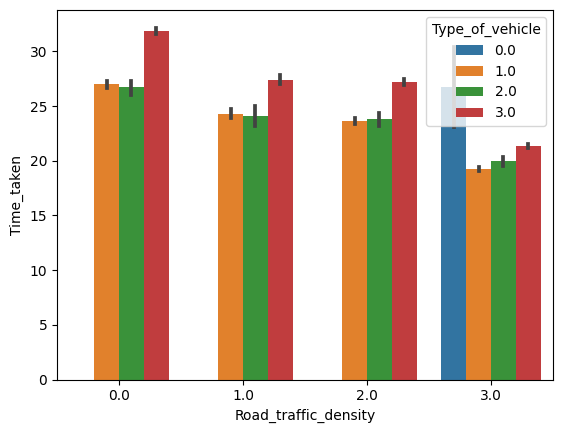

In [821]:
sns.barplot(X_train['Road_traffic_density'],y_train,hue = X_train['Type_of_vehicle'])

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Road_traffic_density', ylabel='Time_taken'>

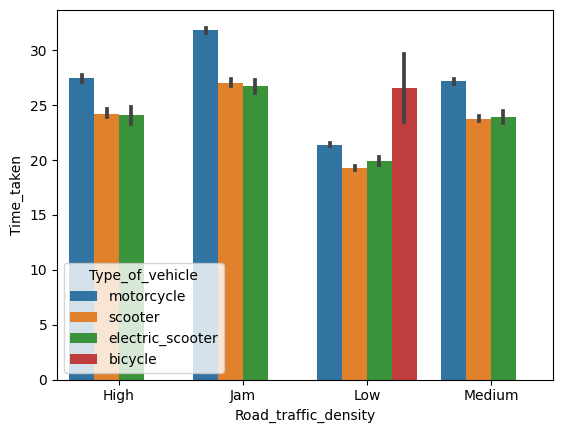

In [822]:
sns.barplot(a['Road_traffic_density'],a['Time_taken'],hue = a['Type_of_vehicle'])

In [793]:
from mlxtend.plotting import plot_decision_regions

In [792]:
pip install mlxtend

     ---------------------------------------- 1.3/1.3 MB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ssaur\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [795]:
plot_decision_regions(X_train,y_train.values,clf=clf, legend=2)

ValueError: X must be a NumPy array. Found <class 'pandas.core.frame.DataFrame'>

In [387]:
ohe = OneHotEncoder()
ohe.fit(X[['Weather','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City']])

OneHotEncoder()

In [388]:
ohe.categories_

[array(['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy'],
       dtype=object),
 array(['High', 'Jam', 'Low', 'Medium'], dtype=object),
 array(['Buffet', 'Drinks', 'Meal', 'Snack'], dtype=object),
 array(['bicycle', 'electric_scooter', 'motorcycle', 'scooter'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Metropolitian', 'Semi-Urban', 'Urban'], dtype=object)]

In [389]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['Weather','Road_traffic_density','Type_of_order','Type_of_vehicle','Festival','City']),
                                     remainder='passthrough')

In [390]:
lr = LinearRegression()

In [391]:
pipe = make_pipeline(column_trans,lr)

In [392]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Cloudy', 'Fog', 'Sandstorms', 'Stormy', 'Sunny', 'Windy'],
      dtype=object),
                                                                            array(['High', 'Jam', 'Low', 'Medium'], dtype=object),
                                                                            array(['Buffet', 'Drinks', 'Meal', 'Snack'], dtype=object),
                                                                            array(['bicycle', 'electric_scooter', 'motorcycle', 'scooter'],
      dtype=object),
                                                                            array(['No', 'Yes'], dtype=object),
                                                                            array(['Metropolitian', 'Semi-Urban', 'Urban'], dtype=object)]),
                                                  ['Weather',
                                                   'Road_traffic_density',
                                                   'Type_of_order',
                                                   'Type_of_vehicle',
                                                   'Festival', 'City'])])),
                ('linearregression', LinearRegression())])

In [393]:
y_pred = pipe.predict(X_test)

In [394]:
r2_score(y_test,y_pred)

0.5843629625608089

In [395]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
    

In [396]:
scores

[0.5805083098378705,
 0.5876633725820193,
 0.5787315138027735,
 0.6015034641951427,
 0.5796237654831979,
 0.5905251251758774,
 0.5895166663189414,
 0.583489114179127,
 0.5879635655278599,
 0.58251480827975,
 0.5821180273772857,
 0.5857867902989385,
 0.5863495331234687,
 0.5772538918041301,
 0.5858195532521113,
 0.5819729997487243,
 0.5810022546451576,
 0.5963890817694322,
 0.5985299858032961,
 0.58557905858894,
 0.5972656577942849,
 0.5835621571775087,
 0.5925161825422391,
 0.5725196565479089,
 0.5912284231307258,
 0.5927326376572004,
 0.5805019563371652,
 0.5901241499707061,
 0.5816930039071839,
 0.5929394755097328,
 0.5826813841988641,
 0.5842623330721053,
 0.5880593406123698,
 0.5935897601840614,
 0.5796809481520208,
 0.5790569174136757,
 0.5817079704157133,
 0.5870791298359113,
 0.5961667972117001,
 0.573434545604459,
 0.585353595495588,
 0.5826343455764965,
 0.5919913203707373,
 0.5882327428588918,
 0.5932870107260713,
 0.5964340564368718,
 0.5896279588132858,
 0.5893418496470567,

In [397]:
np.argmax(scores)

49

In [398]:
scores[np.argmax(scores)]

0.6065314276888063

In [399]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = np.argmax(scores))
lr = LinearRegression()
pipe = make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.6065314276888063

In [400]:
pipe.predict(pd.DataFrame([[11.003669,76.976494,11.043669,77.016494,3]],
                          columns = ['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude ','Vehicle_condition']))

ValueError: columns are missing: {'total_distance', 'Delivery_person_Age', 'multiple_deliveries', 'Delivery_person_Ratings'}

# Test 

In [436]:
b = pd.read_csv('new_test.csv')

In [437]:
b= b.dropna()

In [449]:
b

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
1,1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian
5,5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,9:45,9:55,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11390,11390,0x77aa,INDORES06DEL03,31.0,5.0,22.728163,75.884212,22.818163,75.974212,12-03-2022,22:35,22:50,Fog,Low,0,Meal,motorcycle,1.0,No,Metropolitian
11394,11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35,21:45,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian
11395,11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40,11:45,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian
11397,11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35,18:40,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian


In [441]:
b = b[b['Restaurant_latitude']>0.0]

In [451]:
b['Delivery_person_Ratings'].unique()

array([4.6, 4.5, 4.8, 4.7, 4.9, 4.2, 2.7, 5. , 4.3, 3.8, 4.1, 4.4, 3.9,
       4. , 3.7, 2.8, 3.5, 3.3, 3.4, 3.2, 3.6, 2.9, 2.5, 2.6, 3.1, 3. ])

In [478]:
b

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
1,1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian
2,2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian
3,3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian
4,4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian
5,5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,9:45,9:55,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11390,11390,0x77aa,INDORES06DEL03,31.0,5.0,22.728163,75.884212,22.818163,75.974212,12-03-2022,22:35,22:50,Fog,Low,0,Meal,motorcycle,1.0,No,Metropolitian
11394,11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35,21:45,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian
11395,11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40,11:45,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian
11397,11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35,18:40,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian


C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_distance'>

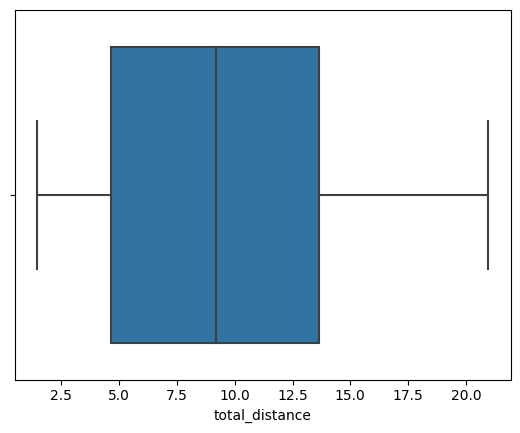

In [512]:
sns.boxplot(b['total_distance'])

In [485]:
# IQR
Q1 = np.percentile(b['Delivery_person_Ratings'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(b['Delivery_person_Ratings'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print(IQR)
print(Q1)
print(Q3)
print



0.40000000000000036
4.5
4.9


C:\Users\ssaur\AppData\Local\Temp\ipykernel_19756\3226515729.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(b['Delivery_person_Ratings'], 25,
C:\Users\ssaur\AppData\Local\Temp\ipykernel_19756\3226515729.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(b['Delivery_person_Ratings'], 75,


In [487]:
#  Upper bound
upper = (Q3+1.5*IQR)
print(upper)
#  Lower bound
lower = (Q1-1.5*IQR)
print(lower)

5.500000000000001
3.8999999999999995


In [493]:
b = b[b['Delivery_person_Ratings']>lower]

In [513]:
b

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,total_distance
1,1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,...,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,17.076642
2,2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,...,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,13.406048
3,3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,...,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,13.413663
4,4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,...,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,17.076283
5,5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,...,9:55,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,1.543935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11390,11390,0x77aa,INDORES06DEL03,31.0,5.0,22.728163,75.884212,22.818163,75.974212,12-03-2022,...,22:50,Fog,Low,0,Meal,motorcycle,1.0,No,Metropolitian,13.612360
11394,11394,0x6909,JAPRES01DEL01,35.0,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,...,21:45,Sunny,Jam,1,Snack,scooter,1.0,No,Metropolitian,16.384924
11395,11395,0x443b,JAPRES11DEL01,33.0,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,...,11:45,Sandstorms,High,1,Drinks,scooter,1.0,No,Metropolitian,1.489844
11397,11397,0x22d4,VADRES03DEL02,27.0,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,...,18:40,Sandstorms,Medium,0,Meal,motorcycle,0.0,No,Metropolitian,19.687805


In [511]:
b['total_distance']=np.vectorize(calculate_dist_lat_long)(b['Restaurant_latitude'],b['Restaurant_longitude'],b['Delivery_location_latitude'],b['Delivery_location_longitude'])

12.975377 77.696664 13.085377 77.806664
12.975377 77.696664 13.085377 77.806664
26.911378 75.789034 27.001378 75.879034
26.766536 75.837333 26.856536 75.927333
12.986047 80.218114 13.096047 80.328114
15.5696 73.742294 15.5796 73.752294
12.914264 77.6784 12.934264 77.6984
22.533662 88.366217 22.583662 88.416217
12.323978 76.627961 12.413978 76.717961
17.411028 78.329645 17.441028 78.359645
10.000706 76.349516 10.040706 76.389516
12.934365 77.616155 13.044365 77.726155
23.354422 85.3329 23.414422 85.3929
17.458998 78.500366 17.488998 78.530366
11.025083 77.015393 11.055083 77.045393
17.429585 78.392621 17.559585 78.522621
12.975996 80.221898 13.005996 80.251898
10.000706 76.349516 10.130706 76.479516
18.554382 73.798206 18.604382 73.848206
12.935662 77.61413 12.995662 77.67413
17.429585 78.392621 17.459585 78.422621
11.022169 76.999594 11.042169 77.019594
17.450851 78.379347 17.510851 78.439347
12.299524 76.64262 12.309524 76.65262
11.016298 76.972076 11.036298 76.992076
11.026117 76.944

C:\Users\ssaur\AppData\Local\Temp\ipykernel_19756\3550514393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['total_distance']=np.vectorize(calculate_dist_lat_long)(b['Restaurant_latitude'],b['Restaurant_longitude'],b['Delivery_location_latitude'],b['Delivery_location_longitude'])


In [560]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9213 entries, 1 to 11398
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   9213 non-null   int64  
 1   ID                           9213 non-null   object 
 2   Delivery_person_ID           9213 non-null   object 
 3   Delivery_person_Age          9213 non-null   float64
 4   Delivery_person_Ratings      9213 non-null   float64
 5   Restaurant_latitude          9213 non-null   float64
 6   Restaurant_longitude         9213 non-null   float64
 7   Delivery_location_latitude   9213 non-null   float64
 8   Delivery_location_longitude  9213 non-null   float64
 9   Order_Date                   9213 non-null   object 
 10  Time_Orderd                  9213 non-null   object 
 11  Time_Order_picked            9213 non-null   object 
 12  Weather                      9213 non-null   object 
 13  Road_traffic_dens

In [577]:
b['City'].value_counts()

Metropolitian    7047
Urban            2128
Semi-Urban         38
Name: City, dtype: int64

In [551]:
def transform_time(t1,t2):
    t1= str(t1)
    t2= str(t2)
    if(":" not in t1 or ":" not in t2):
        return float('NaN')
    else:
        t1h = int(t1.split(":")[0])*60
        t1m = int(t1.split(":")[1][0:2])
        t2h = int(t2.split(":")[0])*60
        t2m = int(t2.split(":")[1][0:2])
        total_time1 = t1h+t1m
        total_time2 = t2h+t2m
        return float(total_time1 - total_time2)

In [552]:
b['orderd-to-pickup-time']=np.vectorize(transform_time)(b['Time_Order_picked'],b['Time_Orderd'])

C:\Users\ssaur\AppData\Local\Temp\ipykernel_19756\3270918282.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['orderd-to-pickup-time']=np.vectorize(transform_time)(b['Time_Order_picked'],b['Time_Orderd'])


In [559]:
b['Order_Date'].astype('datetime64')

C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '29-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '27-03-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15-02-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\ssaur\AppData\Local\Programs\Python\Python39\lib\site-packages\p

1       2022-03-29
2       2022-10-03
3       2022-02-04
4       2022-03-27
5       2022-02-15
           ...    
11390   2022-12-03
11394   2022-03-27
11395   2022-11-03
11397   2022-06-03
11398   2022-03-24
Name: Order_Date, Length: 9213, dtype: datetime64[ns]